# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [3]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.11000%, E_test is 1.37630%
Average number of iterations is 33.81.


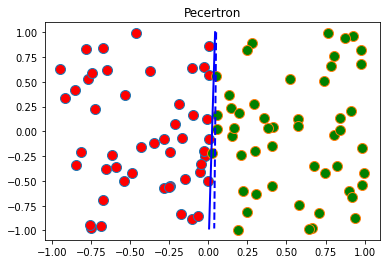

In [4]:
from perceptron import perceptron

nRep = 100 # number of replicates
nTrain = 100 # number of training data
avgIter=0
E_train=0
E_test=0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, iters = perceptron(X, y)
    # Compute training, testing error

    Xt = np.random.random((2, 10000))*2-1
    yt = np.where(np.dot(w_f[1:,0].T,Xt)+w_f[0,0]>0.0,1,-1)

    E_train+=(np.where(np.dot(w_g[1:,0].T,X)+w_g[0,0]>0.0,1,-1)!=y).sum()/y.shape[1]
    E_test+=(np.where(np.dot(w_g[1:,0].T,Xt)+w_g[0,0]>0.0,1,-1)!=yt).sum()/yt.shape[0]

    # Sum up number of iterations
    avgIter+=iters
avgIter/=nRep
E_train/=nRep
E_test/=nRep
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 36.00000%, E_test is 40.23000%


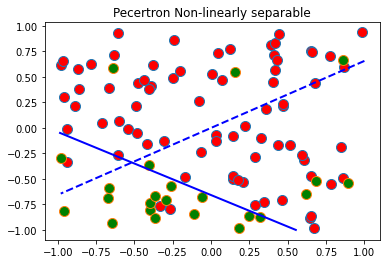

In [5]:
nTrain = 100 # number of training data
X, y, w_f = mkdata(nTrain, 'noisy')
w_g, iters = perceptron(X, y)

Xt = np.random.random((2, 10000))*2-1
yt = np.where(np.dot(w_f[1:,0].T,Xt)+w_f[0,0]>0.0,1,-1)
idx = np.random.choice(nTrain**2, nTrain**2//10)
yt[idx] = -yt[idx]

E_train=(np.where(np.dot(w_g[1:,0].T,X)+w_g[0,0]>0.0,1,-1)!=y).sum()/y.shape[1]
E_test=(np.where(np.dot(w_g[1:,0].T,Xt)+w_g[0,0]>0.0,1,-1)!=yt).sum()/yt.shape[0]

print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


### Part3: Linear Regression

E_train is 3.96900%, E_test is 4.87120%


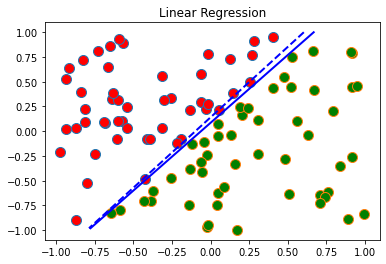

In [6]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
E_train=0
E_test=0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = linear_regression(X, y)
    # Compute training, testing error
    Xt = np.random.random((2, nTrain**2))*2-1
    yt = np.where(np.dot(w_f[1:,0].T,Xt)+w_f[0,0]>0.0,1,-1)
    E_train+=(np.where(np.dot(w_g[1:,0].T,X)+w_g[0,0]>0.0,1,-1)!=y).sum()/y.shape[1]
    E_test+=(np.where(np.dot(w_g[1:,0].T,Xt)+w_g[0,0]>0.0,1,-1)!=yt).sum()/yt.shape[0]
E_train/=nRep
E_test/=nRep
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 13.09100%, E_test is 14.38232%


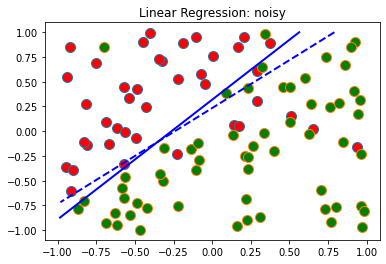

In [7]:


nRep = 1000  # number of replicates
nTrain = 100 # number of training data
E_train=0
E_test=0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = linear_regression(X, y)
    # Compute training, testing error
    Xt = np.random.random((2, nTrain**2))*2-1
    yt = np.where(np.dot(w_f[1:,0].T,Xt)+w_f[0,0]>0.0,1,-1)
    idx = np.random.choice(nTrain**2, nTrain**2//10)
    yt[idx] = -yt[idx]
    E_train+=(np.where(np.dot(w_g[1:,0].T,X)+w_g[0,0]>0.0,1,-1)!=y).sum()/y.shape[1]
    E_test+=(np.where(np.dot(w_g[1:,0].T,Xt)+w_g[0,0]>0.0,1,-1)!=yt).sum()/yt.shape[0]
E_train/=nRep
E_test/=nRep
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [8]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
E_train=(np.where(np.dot(w[1:,0].T,X)+w[0,0]>0,1,-1)!=y).sum()/y.shape[1]
E_test=(np.where(np.dot(w[1:,0].T,X_test)+w[0,0]>0,1,-1)!=y_test).sum()/y_test.shape[1]
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))

# poly_fit with transform
X_t = np.vstack((X,X[0,:]*X[1,:],X[0,:]**2,X[1,:]**2))  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = np.vstack((X_test,X_test[0,:]*X_test[1,:],X_test[0,:]**2,X_test[1,:]**2))  # CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
# Compute training, testing error
E_train=(np.where(np.dot(w[1:,0].T,X_t)+w[0,0]>0,1,-1)!=y).sum()/y.shape[1]
E_test=(np.where(np.dot(w[1:,0].T,X_test_t)+w[0,0]>0,1,-1)!=y_test).sum()/y_test.shape[1]
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))

E_train is 49.00000%, E_test is 54.96000%
E_train is 5.00000%, E_test is 6.60000%


## Part6: Logistic Regression

E_train is 5.27000%, E_test is 6.40480%


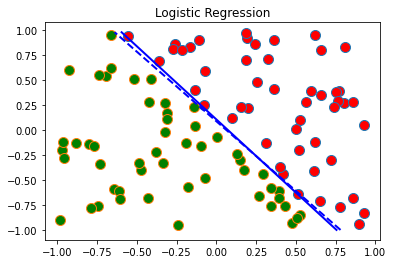

In [9]:
from logistic import logistic
# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
E_train=0
E_test=0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = logistic(X, y);
    # Compute training, testing error
    Xt = np.random.random((2, nTrain**2))*2-1
    yt = np.where(np.dot(w_f[1:,0].T,Xt)+w_f[0,0]>0.0,1,-1)
    E_train+=(np.where(np.dot(w_g[1:,0].T,X)+w_g[0,0]>0.0,1,-1)!=y).sum()/y.shape[1]
    E_test+=(np.where(np.dot(w_g[1:,0].T,Xt)+w_g[0,0]>0.0,1,-1)!=yt).sum()/yt.shape[0]
E_train/=nRep
E_test/=nRep

print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 15.02000%, E_test is 15.63050%


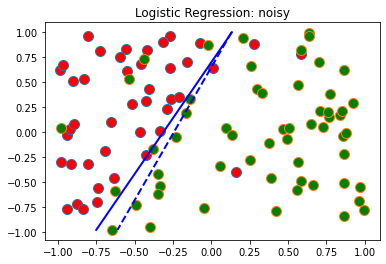

In [10]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data

E_train=0
E_test=0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = logistic(X, y)
    # Compute training, testing error
    Xt = np.random.random((2, nTest))*2-1
    yt = np.where(np.dot(w_f[1:,0].T,Xt)+w_f[0,0]>0.0,1,-1)
    idx = np.random.choice(nTest, nTest//10)
    yt[idx] = -yt[idx]
    E_train+=(np.where(np.dot(w_g[1:,0].T,X)+w_g[0,0]>0.0,1,-1)!=y).sum()/y.shape[1]
    E_test+=(np.where(np.dot(w_g[1:,0].T,Xt)+w_g[0,0]>0.0,1,-1)!=yt).sum()/yt.shape[0]
E_train/=nRep
E_test/=nRep
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.00000%, E_test is 1.07920%
Average number of support vectors is 3.24400.


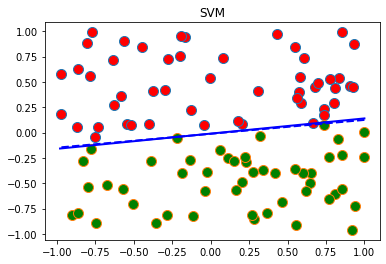

In [11]:
from svm import svm
nRep = 1000; # number of replicates
nTrain = 100; # number of training data
E_train=0
E_test=0
avgNum=0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y.squeeze())
    # Compute training, testing error
    Xt = np.random.random((2, 1000))*2-1
    yt = np.where(np.dot(w_f[1:,0].T,Xt)+w_f[0,0]>0.0,1,-1)
    E_train+=(np.where(np.dot(w_g[1:].T,X)+w_g[0]>0.0,1,-1)!=y).sum()/y.shape[1]
    E_test+=(np.where(np.dot(w_g[1:].T,Xt)+w_g[0]>0.0,1,-1)!=yt).sum()/yt.shape[0]
    # Sum up number of support vectors
    avgNum+=num_sc
avgNum/=nRep
E_train/=nRep
E_test/=nRep
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))
print('Average number of support vectors is {:.5f}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

# Bonus

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.

E_train is 32.00000%, E_test is 27.60000%
Average number of support vectors is 0.00000.


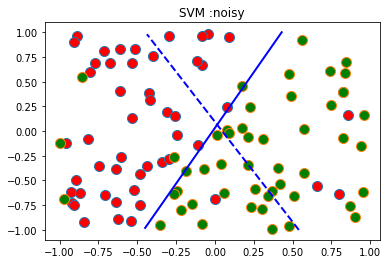

In [29]:
from svm import svm
nRep = 1; # number of replicates
nTrain = 100; # number of training data
E_train=0
E_test=0
avgNum=0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g, num_sc = svm(X, y.squeeze())
    # Compute training, testing error
    Xt = np.random.random((2, 1000))*2-1
    yt = np.where(np.dot(w_f[1:,0].T,Xt)+w_f[0,0]>0.0,1,-1)
    idx = np.random.choice(1000, 1000//10)
    yt[idx] = -yt[idx]
    E_train+=(np.where(np.dot(w_g[1:].T,X)+w_g[0]>0.0,1,-1)!=y).sum()/y.shape[1]
    E_test+=(np.where(np.dot(w_g[1:].T,Xt)+w_g[0]>0.0,1,-1)!=yt).sum()/yt.shape[0]
    # Sum up number of support vectors
    avgNum+=num_sc
avgNum/=nRep
E_train/=nRep
E_test/=nRep
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))
print('Average number of support vectors is {:.5f}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM :noisy')

E_train is 11.00000%, E_test is 11.10000%
Average number of support vectors is 26.00000.


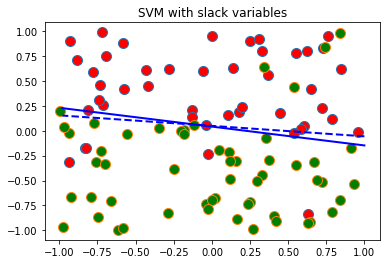

In [28]:
from svm_slack import svm
nRep = 1; # number of replicates
nTrain = 100; # number of training data
E_train=0
E_test=0
avgNum=0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g, num_sc = svm(X, y.squeeze(),C=1)
    # Compute training, testing error
    Xt = np.random.random((2, 1000))*2-1
    yt = np.where(np.dot(w_f[1:,0].T,Xt)+w_f[0,0]>0.0,1,-1)
    idx = np.random.choice(1000, 1000//10)
    yt[idx] = -yt[idx]
    E_train+=(np.where(np.dot(w_g[1:].T,X)+w_g[0]>0.0,1,-1)!=y).sum()/y.shape[1]
    E_test+=(np.where(np.dot(w_g[1:].T,Xt)+w_g[0]>0.0,1,-1)!=yt).sum()/yt.shape[0]
    # Sum up number of support vectors
    avgNum+=num_sc
avgNum/=nRep
E_train/=nRep
E_test/=nRep
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))
print('Average number of support vectors is {:.5f}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM with slack variables')